C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.9182221873822776


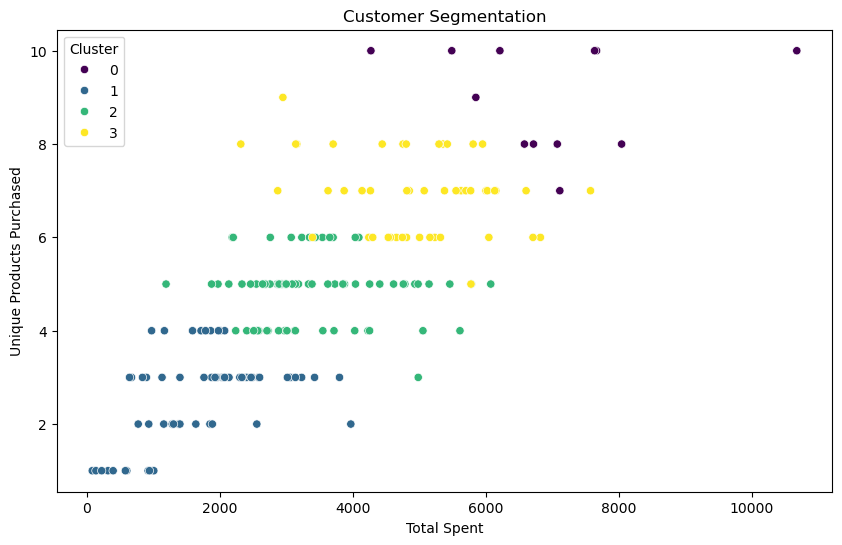

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv(r"Downloads\Customers.csv")
transactions = pd.read_csv(r"Downloads\Transactions.csv")


data = pd.merge(transactions, customers, on="CustomerID")


features = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Normalize features using standaerdized so that v
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.iloc[:, 1:])

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust n_clusters
labels = kmeans.fit_predict(scaled_features)

# Add labels to the original dataset
features['Cluster'] = labels

# Evaluate with DB Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['total_spent'], y=features['unique_products'], hue=features['Cluster'], palette="viridis")
plt.title("Customer Segmentation")
plt.xlabel("Total Spent")
plt.ylabel("Unique Products Purchased")
plt.legend(title="Cluster")
plt.show()

# Save clustering results
features.to_csv("ClusteringResults.csv", index=False)
